## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()
# study_results.head()

# Remove duplicate IDs
mouse_metadata["Mouse ID"].unique()
# mouse_metadata["Mouse ID"].sort_values

# sort_mouse_data = mouse_metadata.sort_values("Mouse ID")

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"],  how="left")


# Display the data table for preview
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
new_df["Mouse ID"].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_df = pd.DataFrame(data=new_df)

clean_mouse_df = new_mouse_df.drop_duplicates(subset=['Mouse ID']).sort_values("Mouse ID")

clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
1860,z435,Propriva,Female,12,26,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].count()

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_by_tumor_volume = clean_mouse_df.groupby(['Tumor Volume (mm3)'])


tumor_volume_mean = clean_mouse_df.mean()
tumor_volume_median = clean_mouse_df.median()
tumor_volume_variance = clean_mouse_df.var()
tumor_volume_std_deviation = clean_mouse_df.std()
tumor_volume_sems = clean_mouse_df.sem()




In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

new_tumor_summary = pd.DataFrame({"TV Mean": tumor_volume_mean, "TV Median": tumor_volume_median, "TV Variance": tumor_volume_variance,
                                     "TV Std Deviation": tumor_volume_std_deviation, "TV SEMS": tumor_volume_sems
                                 })

# Using the aggregation method, produce the same summary statistics in a single line
new_tumor_summary

,TV Mean,TV Median,TV Variance,TV Std Deviation,TV SEMS
Age_months,12.730924,13.0,52.253919,7.228687,0.458099
Weight (g),26.116466,27.0,13.667833,3.697003,0.234288
Timepoint,0.000000,0.0,0.000000,0.000000,0.000000
Tumor Volume (mm3),45.000000,45.0,0.000000,0.000000,0.000000
Metastatic Sites,0.000000,0.0,0.000000,0.000000,0.000000


## Bar and Pie Charts

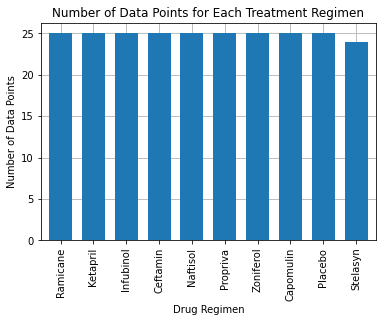

In [15]:

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_plot = clean_mouse_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

bar_plot.grid(zorder=0)


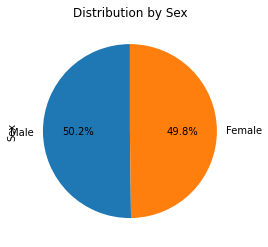

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_by_male = clean_mouse_df['Sex'].value_counts()
pie_plot = plot_by_male.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')


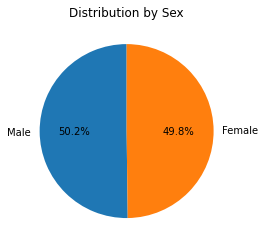

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot_by_female = clean_mouse_df['Sex'].value_counts()

plt.pie(plot_by_female, labels=plot_by_female.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_treatment_df = pd.DataFrame(clean_mouse_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
tumor_volume_treatment_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_volume_df = pd.merge(clean_mouse_df, tumor_volume_treatment_df, on='Mouse ID')
merged_tumor_volume_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,a203,Infubinol,Female,20,23,0,45.0,0,0
1,a251,Infubinol,Female,21,25,0,45.0,0,0
2,a262,Placebo,Female,17,29,0,45.0,0,0
3,a275,Ceftamin,Female,20,28,0,45.0,0,0
4,a366,Stelasyn,Female,16,29,0,45.0,0,0


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

for treatment in treatments:
    
    new_df = merged_tumor_volume_df.loc[merged_tumor_volume_df['Drug Regimen'] == treatment]

    total_df = new_df.loc[new_df['Timepoint'] == new_df['max_timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    treatment_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    
#     outliers_bounds = (values.loc[(total_df['Tumor Volume (mm3)'] >= upper_bound) | 
#                                         (total_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
#     print(f'Number of {treatment} outliers: {outliers_bounds}')


    

IQR for Capomulin: 0.0
Lower Bound for Capomulin: 45.0
Upper Bound for Capomulin: 45.0
IQR for Ramicane: 0.0
Lower Bound for Ramicane: 45.0
Upper Bound for Ramicane: 45.0
IQR for Infubinol: 0.0
Lower Bound for Infubinol: 45.0
Upper Bound for Infubinol: 45.0
IQR for Ceftamin: 0.0
Lower Bound for Ceftamin: 45.0
Upper Bound for Ceftamin: 45.0


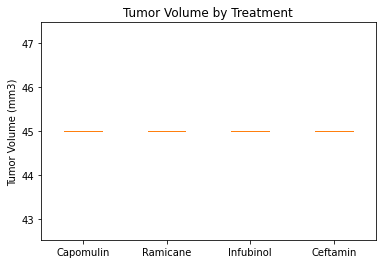

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(treatment_values, flierprops=flierprops)

plt.title('Tumor Volume by Treatment')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_mouse_df.loc[clean_mouse_df['Mouse ID'] == 's185']

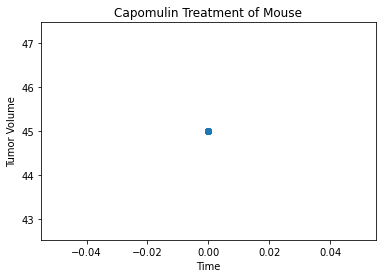

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.plot(clean_mouse_df['Timepoint'], clean_mouse_df['Tumor Volume (mm3)'], marker = 'o')

plt.title("Capomulin Treatment of Mouse")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']
volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
volume_df = pd.merge(capomulin_df, volume_df, on='Mouse ID')
final_df = volume_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
volume_df
x = final_df['Weight (g)']
y = final_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.title('Average Tumor Volume by Weight')
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

NameError: name 'slope' is not defined